In [16]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split,cross_val_score,KFold
from sklearn import metrics
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score,f1_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn import preprocessing


#libraries for model performance evaluation
from sklearn import metrics
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score,f1_score

#libraries for visualization
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from matplotlib.colors import ListedColormap

# libraries for computation
import pandas as pd
import numpy as np

#library for train test split
from sklearn.model_selection import train_test_split,cross_val_score,KFold

#library for preprocessing
from sklearn.preprocessing import StandardScaler

#library for Dimensionality reduction
from sklearn.decomposition import PCA
from sklearn.decomposition import TruncatedSVD

#Library for feature selection techniques
from sklearn.feature_selection import RFE
from sklearn.feature_selection import RFECV
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
from sklearn.feature_selection import SelectFromModel

#libraries for various ML models 
from sklearn import svm
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.neural_network import MLPClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
#ensemble models
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import VotingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import RandomForestRegressor



#libraries for model performance evaluation
from sklearn import metrics
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score,f1_score

#libraries for visualization
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from matplotlib.colors import ListedColormap

import warnings
warnings.filterwarnings('ignore')

In [18]:
# Read data from csv and print the head
data = pd.read_csv('Commercial-bank-other-lending.csv')
data.head(5)

,Country or Area,Year,Value
0,Afghanistan,2016,0.0
1,Afghanistan,2015,0.0
2,Afghanistan,2014,0.0
3,Afghanistan,2013,0.0
4,Afghanistan,2012,0.0


In [19]:
nan_rows = data[data['Value'].isnull()]
nan_rows

,Country or Area,Year,Value


In [20]:
# Normalize the value column and drop old column

# Create x, where x the 'Value' column's values as floats
x = data[['Value']].values.astype(float)

# Create a minimum and maximum processor object
min_max_scaler = preprocessing.MinMaxScaler()

# Create an object to transform the data to fit minmax processor
x_scaled = min_max_scaler.fit_transform(x)

# Run the normalizer on the dataframe
df_normalized = pd.DataFrame(x_scaled)
df_normalized['normalized'] = pd.DataFrame(x_scaled)
df_normalized.drop(columns=0,inplace=True)

data_new = pd.concat([data,df_normalized ], axis=1)
data_new.drop(columns='Value',inplace=True)

In [21]:
# Check new dataframe with normalized value
data_new.head()

,Country or Area,Year,normalized
0,Afghanistan,2016,0.208872
1,Afghanistan,2015,0.208872
2,Afghanistan,2014,0.208872
3,Afghanistan,2013,0.208872
4,Afghanistan,2012,0.208872


In [22]:
from tsfresh import extract_features
extracted_features = extract_features(data, column_id="Country or Area", column_sort="Year")

Feature Extraction: 100%|██████████| 10/10 [00:13<00:00,  1.23s/it]


In [23]:
#Check extracted features
extracted_features.head()

variable,Value__abs_energy,Value__absolute_sum_of_changes,"Value__agg_autocorrelation__f_agg_""mean""","Value__agg_autocorrelation__f_agg_""median""","Value__agg_autocorrelation__f_agg_""var""","Value__agg_linear_trend__f_agg_""max""__chunk_len_10__attr_""intercept""","Value__agg_linear_trend__f_agg_""max""__chunk_len_10__attr_""rvalue""","Value__agg_linear_trend__f_agg_""max""__chunk_len_10__attr_""slope""","Value__agg_linear_trend__f_agg_""max""__chunk_len_10__attr_""stderr""","Value__agg_linear_trend__f_agg_""max""__chunk_len_50__attr_""intercept""",...,Value__time_reversal_asymmetry_statistic__lag_1,Value__time_reversal_asymmetry_statistic__lag_2,Value__time_reversal_asymmetry_statistic__lag_3,Value__value_count__value_-inf,Value__value_count__value_0,Value__value_count__value_1,Value__value_count__value_inf,Value__value_count__value_nan,Value__variance,Value__variance_larger_than_standard_deviation
id,,,,,,,,,,,,,,,,,,,,,
Afghanistan,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.0,0.000000e+00,NaN,...,0.000000e+00,0.000000e+00,0.000000e+00,0.0,47.0,0.0,0.0,0.0,0.000000e+00,0.0
Albania,7.403203e+17,2.784563e+09,-0.101967,-0.102427,0.044448,-4.963300e+07,0.731103,108527100.0,5.847267e+07,NaN,...,1.259800e+23,-8.145169e+23,-4.867353e+23,0.0,21.0,0.0,0.0,0.0,1.375792e+16,1.0
Algeria,4.391457e+19,2.533893e+10,-0.149565,-0.258157,0.131439,2.883882e+09,-0.932829,-858683400.0,1.914957e+08,NaN,...,2.874012e+24,2.355983e+26,4.885982e+26,0.0,0.0,0.0,0.0,0.0,9.185595e+17,1.0
Angola,3.543443e+19,2.573797e+10,-0.025353,-0.032502,0.014054,-2.937278e+08,0.931722,782877100.0,1.761809e+08,NaN,...,6.624320e+26,4.088261e+26,2.462210e+26,0.0,19.0,0.0,0.0,0.0,7.213300e+17,1.0
Argentina,1.781334e+20,6.476425e+10,0.001669,-0.022753,0.073780,4.714534e+09,-0.246383,-243961300.0,5.540524e+08,NaN,...,3.197802e+27,2.336071e+27,2.802139e+27,0.0,0.0,0.0,0.0,0.0,3.362083e+18,1.0


In [24]:
#Check shape of new data with extracted features
extracted_features.shape

(135, 794)

In [25]:
#Check if any columns contains Nan values (null values)
list_cols_with_nan = extracted_features.columns[extracted_features.isna().any()].tolist()
len(list_cols_with_nan)

408

In [26]:
#lets replace nan value with 0.0
from tsfresh import select_features
from tsfresh.utilities.dataframe_functions import impute
data_after_impute = impute(extracted_features)

 'Value__agg_linear_trend__f_agg_"max"__chunk_len_50__attr_"rvalue"'
 'Value__agg_linear_trend__f_agg_"max"__chunk_len_50__attr_"slope"'
 'Value__agg_linear_trend__f_agg_"max"__chunk_len_50__attr_"stderr"'
 'Value__agg_linear_trend__f_agg_"mean"__chunk_len_50__attr_"intercept"'
 'Value__agg_linear_trend__f_agg_"mean"__chunk_len_50__attr_"rvalue"'
 'Value__agg_linear_trend__f_agg_"mean"__chunk_len_50__attr_"slope"'
 'Value__agg_linear_trend__f_agg_"mean"__chunk_len_50__attr_"stderr"'
 'Value__agg_linear_trend__f_agg_"min"__chunk_len_50__attr_"intercept"'
 'Value__agg_linear_trend__f_agg_"min"__chunk_len_50__attr_"rvalue"'
 'Value__agg_linear_trend__f_agg_"min"__chunk_len_50__attr_"slope"'
 'Value__agg_linear_trend__f_agg_"min"__chunk_len_50__attr_"stderr"'
 'Value__agg_linear_trend__f_agg_"var"__chunk_len_50__attr_"intercept"'
 'Value__agg_linear_trend__f_agg_"var"__chunk_len_50__attr_"rvalue"'
 'Value__agg_linear_trend__f_agg_"var"__chunk_len_50__attr_"slope"'
 'Value__agg_linear_trend

In [27]:
#lets check if any column has any nan value
list_cols_with_nan_after_impute = data_after_impute.columns[data_after_impute.isna().any()].tolist()
len(list_cols_with_nan_after_impute)

0

In [28]:
#Creating new Csv
data_after_impute.to_csv('new-Commercial.csv')

In [29]:
# read from new csv file 
df = pd.read_csv('new-Commercial.csv')
df.head()

,id,Value__abs_energy,Value__absolute_sum_of_changes,"Value__agg_autocorrelation__f_agg_""mean""","Value__agg_autocorrelation__f_agg_""median""","Value__agg_autocorrelation__f_agg_""var""","Value__agg_linear_trend__f_agg_""max""__chunk_len_10__attr_""intercept""","Value__agg_linear_trend__f_agg_""max""__chunk_len_10__attr_""rvalue""","Value__agg_linear_trend__f_agg_""max""__chunk_len_10__attr_""slope""","Value__agg_linear_trend__f_agg_""max""__chunk_len_10__attr_""stderr""",...,Value__time_reversal_asymmetry_statistic__lag_1,Value__time_reversal_asymmetry_statistic__lag_2,Value__time_reversal_asymmetry_statistic__lag_3,Value__value_count__value_-inf,Value__value_count__value_0,Value__value_count__value_1,Value__value_count__value_inf,Value__value_count__value_nan,Value__variance,Value__variance_larger_than_standard_deviation
0,Afghanistan,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.0,0.000000e+00,...,0.000000e+00,0.000000e+00,0.000000e+00,0.0,47.0,0.0,0.0,0.0,0.000000e+00,0.0
1,Albania,7.403203e+17,2.784563e+09,-0.101967,-0.102427,0.044448,-4.963300e+07,0.731103,108527100.0,5.847267e+07,...,1.259800e+23,-8.145169e+23,-4.867353e+23,0.0,21.0,0.0,0.0,0.0,1.375792e+16,1.0
2,Algeria,4.391457e+19,2.533893e+10,-0.149565,-0.258157,0.131439,2.883882e+09,-0.932829,-858683400.0,1.914957e+08,...,2.874012e+24,2.355983e+26,4.885982e+26,0.0,0.0,0.0,0.0,0.0,9.185595e+17,1.0
3,Angola,3.543443e+19,2.573797e+10,-0.025353,-0.032502,0.014054,-2.937278e+08,0.931722,782877100.0,1.761809e+08,...,6.624320e+26,4.088261e+26,2.462210e+26,0.0,19.0,0.0,0.0,0.0,7.213300e+17,1.0
4,Argentina,1.781334e+20,6.476425e+10,0.001669,-0.022753,0.073780,4.714534e+09,-0.246383,-243961300.0,5.540524e+08,...,3.197802e+27,2.336071e+27,2.802139e+27,0.0,0.0,0.0,0.0,0.0,3.362083e+18,1.0


In [30]:
# we need to give labels to countries 
data_countries = pd.read_excel('Developing countries.xlsx')

developed_countries = data_countries [data_countries['Value'] == 0]
developing_countries = data_countries [data_countries['Value'] == 1] 

list_developed_countries = developed_countries['Countries']
list_developing_countries = developing_countries['Countries']

list_developed_countries = list(list_developed_countries)
list_developing_countries = list(list_developing_countries)

df['label'] = -1

for i,da in df.iterrows():
    if da['id'] in list_developed_countries:
        val = 1
        df.at[i,'label'] = val
    elif da['id'] in list_developing_countries:
        val = 0
        df.at[i,'label'] = val

In [31]:
# check new df with added column as label 
df.head()

,id,Value__abs_energy,Value__absolute_sum_of_changes,"Value__agg_autocorrelation__f_agg_""mean""","Value__agg_autocorrelation__f_agg_""median""","Value__agg_autocorrelation__f_agg_""var""","Value__agg_linear_trend__f_agg_""max""__chunk_len_10__attr_""intercept""","Value__agg_linear_trend__f_agg_""max""__chunk_len_10__attr_""rvalue""","Value__agg_linear_trend__f_agg_""max""__chunk_len_10__attr_""slope""","Value__agg_linear_trend__f_agg_""max""__chunk_len_10__attr_""stderr""",...,Value__time_reversal_asymmetry_statistic__lag_2,Value__time_reversal_asymmetry_statistic__lag_3,Value__value_count__value_-inf,Value__value_count__value_0,Value__value_count__value_1,Value__value_count__value_inf,Value__value_count__value_nan,Value__variance,Value__variance_larger_than_standard_deviation,label
0,Afghanistan,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.0,0.000000e+00,...,0.000000e+00,0.000000e+00,0.0,47.0,0.0,0.0,0.0,0.000000e+00,0.0,-1
1,Albania,7.403203e+17,2.784563e+09,-0.101967,-0.102427,0.044448,-4.963300e+07,0.731103,108527100.0,5.847267e+07,...,-8.145169e+23,-4.867353e+23,0.0,21.0,0.0,0.0,0.0,1.375792e+16,1.0,-1
2,Algeria,4.391457e+19,2.533893e+10,-0.149565,-0.258157,0.131439,2.883882e+09,-0.932829,-858683400.0,1.914957e+08,...,2.355983e+26,4.885982e+26,0.0,0.0,0.0,0.0,0.0,9.185595e+17,1.0,0
3,Angola,3.543443e+19,2.573797e+10,-0.025353,-0.032502,0.014054,-2.937278e+08,0.931722,782877100.0,1.761809e+08,...,4.088261e+26,2.462210e+26,0.0,19.0,0.0,0.0,0.0,7.213300e+17,1.0,0
4,Argentina,1.781334e+20,6.476425e+10,0.001669,-0.022753,0.073780,4.714534e+09,-0.246383,-243961300.0,5.540524e+08,...,2.336071e+27,2.802139e+27,0.0,0.0,0.0,0.0,0.0,3.362083e+18,1.0,0


 0    79
-1    54
 1     2
Name: label, dtype: int64


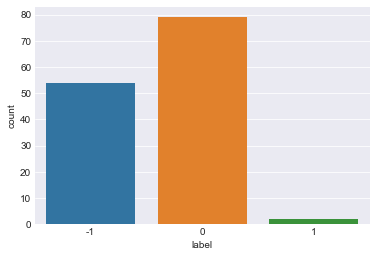

In [44]:
#lets have a look at how many instances do we have for each class
print(df.label.value_counts())
sns.set_style('darkgrid')
sns.countplot(x ='label',data=df)

In [32]:
#Split data into X(features),y 
y = df['label']
X = df.drop(columns=['id','label'])

In [33]:
# train and test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.40, random_state=42)

In [34]:
knn = KNeighborsClassifier(n_neighbors=10)
knn.fit(X_train,y_train)
pred = knn.predict(X_test)
dsf = classification_report(y_test,pred)
acc = accuracy_score(y_test,pred) 
print(dsf)
print('Accuracy is: ',acc)

             precision    recall  f1-score   support

         -1       0.45      0.64      0.53        22
          0       0.61      0.45      0.52        31
          1       0.00      0.00      0.00         1

avg / total       0.53      0.52      0.51        54

Accuracy is:  0.5185185185185185


[0.5555555555555556, 0.48148148148148145, 0.5740740740740741, 0.48148148148148145, 0.5185185185185185, 0.48148148148148145, 0.5185185185185185, 0.5, 0.5740740740740741, 0.5185185185185185, 0.5925925925925926, 0.5555555555555556, 0.5740740740740741, 0.5740740740740741, 0.5925925925925926]


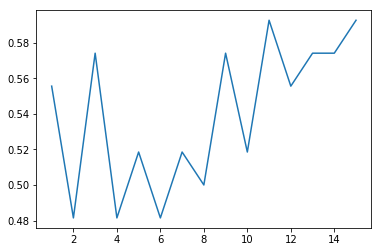

In [35]:
#KNN for different k values
kVals = [1,2,3,4,5,6,7,8,9,10,11,12,13,14,15]
scores = []

for k in kVals:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train,y_train)
    pred = knn.predict(X_test)
    scores.append(accuracy_score(y_test,pred))
    
plt.plot(kVals,scores)    
print(scores) 

In [36]:
rf_classifier = RandomForestClassifier(n_estimators=10, random_state = 42)
rf_classifier.fit(X_train,y_train)
pred = rf_classifier.predict(X_test)
print("F1 Score: ", metrics.f1_score(y_test,pred, average='weighted'))
print("Accuracy Score: ", accuracy_score(y_test,pred))

F1 Score:  0.680267838459929
Accuracy Score:  0.6851851851851852


[0.6632925298179536, 0.680267838459929, 0.6817707926082309, 0.6983714210664566, 0.6983714210664566, 0.6983714210664566, 0.6983714210664566, 0.6983714210664566, 0.6983714210664566, 0.7163221667854598, 0.7163221667854598, 0.7163221667854598]


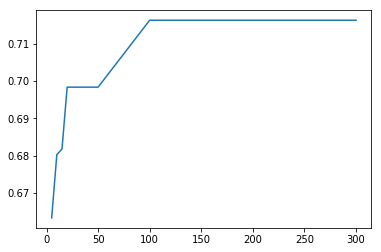

In [37]:
#Ensemble Random Forest Classifier Fine Tunning
estimators = [5,10,15,20,30,35,40,45,50,100,200,300]
f1_scores = []
for e in estimators:
    rf_classifier = RandomForestClassifier(n_estimators=e, random_state = 42)
    rf_classifier.fit(X_train,y_train)
    pred = rf_classifier.predict(X_test)
    f1_scores.append(f1_score(y_test,pred,average='weighted'))
    
plt.plot(estimators,f1_scores) 
print(f1_scores)

In [38]:
#Logistic Regression
logmodel = LogisticRegression()
logmodel.fit(X_train,y_train)
pred = logmodel.predict(X_test)
print("F1 Score: ", metrics.f1_score(y_test,pred, average='weighted'))
print("Accuracy Score: ", accuracy_score(y_test,pred))

F1 Score:  0.4961057049132258
Accuracy Score:  0.42592592592592593


In [41]:
#ExtraTreeClassifier
model = ExtraTreesClassifier(n_estimators=5,random_state=7)
model.fit(X_train, y_train)
pred = model.predict(X_test)
print("F1 Score: ", metrics.f1_score(y_test,pred, average='weighted'))
print("Accuracy Score: ", accuracy_score(y_test,pred))
dsf = classification_report(y_test,pred)
print(dsf)

F1 Score:  0.7163221667854598
Accuracy Score:  0.7222222222222222
             precision    recall  f1-score   support

         -1       0.67      0.73      0.70        22
          0       0.77      0.74      0.75        31
          1       0.00      0.00      0.00         1

avg / total       0.71      0.72      0.72        54



[0.6932605184637706, 0.6784244562022339, 0.6958440999138674, 0.7327330964685616, 0.7327330964685616, 0.7341563786008231, 0.7519106407995296, 0.7151675485008817, 0.7327330964685616, 0.7341563786008231, 0.6784244562022339, 0.7341563786008231]


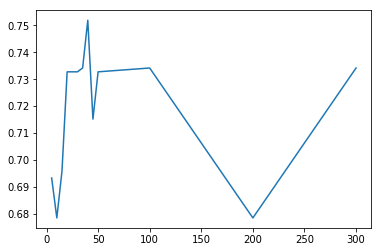

In [40]:
estimators = [5,10,15,20,30,35,40,45,50,100,200,300]
f1_scores = []
for e in estimators:
    rf_classifier = ExtraTreesClassifier(n_estimators=e, random_state = 42)
    rf_classifier.fit(X_train,y_train)
    pred = rf_classifier.predict(X_test)
    f1_scores.append(f1_score(y_test,pred,average='weighted'))
    
plt.plot(estimators,f1_scores) 
print(f1_scores)

In [53]:
countries_df = pd.read_excel('Update-coutry-classification .xlsx')

In [54]:
countries_df['Countries']

0                               Austria
1                               Belgium
2                               Denmark
3                               Finland
4                                France
5                               Germany
6                                Greece
7                               Ireland
8                                 Italy
9                            Luxembourg
10                          Netherlands
11                             Portugal
12                                Spain
13                               Sweden
14                       United Kingdom
15                              Iceland
16                               Norway
17                          Switzerland
18                             Bulgaria
19                              Croatia
20                               Cyprus
21                       Czech Republic
22                              Estonia
23                              Hungary
24                               Latvia
